Importing the Fashion MNIST data from keras and diving it into training and testing data


In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

Reshaping the data to 1-D vector to feed to the model
We are also normalising the data to 0-1scale using preprocessing class 





In [4]:
from sklearn import model_selection, svm, preprocessing

In [5]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

Fitting the SVM model to the training datasets x_train,y_train where y_train are the class labels

In [6]:
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

The variable predictions is storing the classes predicted by the SVM model

In [7]:
predictions = linear_svm.predict(x_test)

Importing the class metrics for evaluation of the model

In [8]:
from sklearn import metrics

Creating the confusion matrix , where the diagonal of the matrix represnets the classes correctly predicted by the SVM model

In [9]:
con_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

In [10]:
print(con_matrix)

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  927    0    3    6    3   19]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


Calculating the accuracy of the model

In [11]:
acc=metrics.accuracy_score(y_test,predictions)
print(acc)

0.928


Importing class for cross validation

In [12]:
from sklearn.model_selection import cross_val_score

Tuning Hyperparameter C, and varying its value. We are also using K-Cross validation to evaluate the model 

In [13]:
c=[0.5,1,1.5,3,5,10]
M=[]

In [14]:
for i in range(len(c)):
  svm_model=svm.SVC(kernel="linear",C=c[i])
  M.append(cross_val_score(svm_model, x_train, y_train, cv=4))

  

In [20]:
import numpy as np

means=[np.mean(x) for x in M]

In [21]:
means

[0.9212168416572191,
 0.918983685915749,
 0.9179837114084166,
 0.9164670857403479,
 0.9154837056793017,
 0.9140836100304102]

Plotting Cross Validation for different value of C

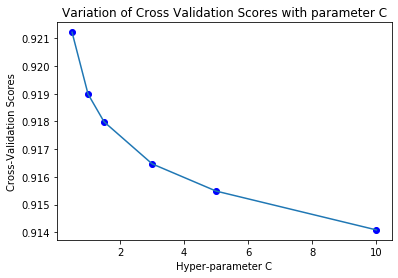

In [26]:
import matplotlib.pyplot as plt

plt.plot(c,means,'bo')
plt.plot(c,means)
plt.title('Variation of Cross Validation Scores with parameter C')
plt.xlabel('Hyper-parameter C')
plt.ylabel('Cross-Validation Scores')
plt.show()